In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#%matplotlib notebook

In [2]:
n=20

data_renfe = pd.read_csv('thegurus-opendata-renfe-trips.csv', skiprows = lambda i: i>0 and i%n != np.random.randint(0,n-1)) 
#data_renfe = pd.read_csv('thegurus-opendata-renfe-trips.csv', nrows = n) 

In [3]:
data_renfe.head(15)

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
1,22,renfe,MADRID,BARCELONA,2019-04-18 10:30:00,2019-04-18 13:15:00,2.75,AVE,Turista Plus,102.15,Promo,NaN,{},2019-04-11 21:49:46
2,73,renfe,MADRID,BARCELONA,2019-05-22 17:30:00,2019-05-22 20:40:00,3.17,AVE,Turista,85.10,Promo,NaN,{},2019-04-11 21:50:04
3,113,renfe,MADRID,BARCELONA,2019-05-22 19:00:00,2019-05-22 21:30:00,2.50,AVE,Turista Plus,82.35,Promo,NaN,{},2019-04-11 21:50:04
4,138,renfe,MADRID,BARCELONA,2019-04-22 07:15:00,2019-04-22 16:37:00,9.37,R. EXPRES,Turista,43.25,Adulto ida,NaN,{},2019-04-11 21:50:04
5,167,renfe,MADRID,BARCELONA,2019-04-22 18:30:00,2019-04-22 21:20:00,2.83,AVE,Turista,107.70,Flexible,NaN,{},2019-04-11 21:50:04
6,173,renfe,MADRID,BARCELONA,2019-04-22 17:30:00,2019-04-22 20:40:00,3.17,AVE,Turista,107.70,Flexible,NaN,{},2019-04-11 21:50:04
7,210,renfe,MADRID,BARCELONA,2019-04-27 17:30:00,2019-04-27 20:40:00,3.17,AVE,Turista Plus,49.15,Promo,NaN,{},2019-04-11 21:50:20
8,222,renfe,MADRID,BARCELONA,2019-05-28 08:20:00,2019-05-28 11:05:00,2.75,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:50:23
9,226,renfe,MADRID,BARCELONA,2019-05-28 09:00:00,2019-05-28 11:45:00,2.75,AVE,Turista,85.10,Promo,NaN,{},2019-04-11 21:50:23


In [4]:
def dropcolumns(raw_df):
    dropped_df = raw_df.drop(['company', 'vehicle_type', 'seats', 'meta', 'insert_date'], axis=1)
    return dropped_df

In [5]:
data_renfe_dropped = dropcolumns(data_renfe)

In [6]:
data_renfe_dropped.head(15)

,id,origin,destination,departure,arrival,duration,vehicle_class,price,fare
0,4,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,Preferente,NaN,Promo
1,22,MADRID,BARCELONA,2019-04-18 10:30:00,2019-04-18 13:15:00,2.75,Turista Plus,102.15,Promo
2,73,MADRID,BARCELONA,2019-05-22 17:30:00,2019-05-22 20:40:00,3.17,Turista,85.10,Promo
3,113,MADRID,BARCELONA,2019-05-22 19:00:00,2019-05-22 21:30:00,2.50,Turista Plus,82.35,Promo
4,138,MADRID,BARCELONA,2019-04-22 07:15:00,2019-04-22 16:37:00,9.37,Turista,43.25,Adulto ida
5,167,MADRID,BARCELONA,2019-04-22 18:30:00,2019-04-22 21:20:00,2.83,Turista,107.70,Flexible
6,173,MADRID,BARCELONA,2019-04-22 17:30:00,2019-04-22 20:40:00,3.17,Turista,107.70,Flexible
7,210,MADRID,BARCELONA,2019-04-27 17:30:00,2019-04-27 20:40:00,3.17,Turista Plus,49.15,Promo
8,222,MADRID,BARCELONA,2019-05-28 08:20:00,2019-05-28 11:05:00,2.75,Turista,75.40,Promo
9,226,MADRID,BARCELONA,2019-05-28 09:00:00,2019-05-28 11:45:00,2.75,Turista,85.10,Promo


In [7]:
del data_renfe

In [8]:
def pre_processing(df):
    #df_treated = df[["origin", "destination", "departure", "arrival","duration","vehicle_class", "price"]]
    temp_depart = df["departure"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    df["depart_day"] = temp_depart.apply(lambda x: x.strftime("%A"))
    df["depart_date"] = temp_depart.apply(lambda x: x.strftime("%d-%m-%Y"))
    df["depart_time"] = temp_depart.apply(lambda x: x.strftime("%H:%M:%S"))
    temp_arrival = df["arrival"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    df["arrival_day"] = temp_arrival.apply(lambda x: x.strftime("%A"))
    df["arrival_date"] = temp_arrival.apply(lambda x: x.strftime("%d-%m-%Y"))
    df["arrival_time"] = temp_arrival.apply(lambda x: x.strftime("%H:%M:%S"))
    return df

In [9]:
data_renfe_time = pre_processing(data_renfe_dropped)

In [10]:
data_renfe_time.head(15)

,id,origin,destination,departure,arrival,duration,vehicle_class,price,fare,depart_day,depart_date,depart_time,arrival_day,arrival_date,arrival_time
0,4,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,Preferente,NaN,Promo,Thursday,18-04-2019,15:30:00,Thursday,18-04-2019,18:40:00
1,22,MADRID,BARCELONA,2019-04-18 10:30:00,2019-04-18 13:15:00,2.75,Turista Plus,102.15,Promo,Thursday,18-04-2019,10:30:00,Thursday,18-04-2019,13:15:00
2,73,MADRID,BARCELONA,2019-05-22 17:30:00,2019-05-22 20:40:00,3.17,Turista,85.10,Promo,Wednesday,22-05-2019,17:30:00,Wednesday,22-05-2019,20:40:00
3,113,MADRID,BARCELONA,2019-05-22 19:00:00,2019-05-22 21:30:00,2.50,Turista Plus,82.35,Promo,Wednesday,22-05-2019,19:00:00,Wednesday,22-05-2019,21:30:00
4,138,MADRID,BARCELONA,2019-04-22 07:15:00,2019-04-22 16:37:00,9.37,Turista,43.25,Adulto ida,Monday,22-04-2019,07:15:00,Monday,22-04-2019,16:37:00
5,167,MADRID,BARCELONA,2019-04-22 18:30:00,2019-04-22 21:20:00,2.83,Turista,107.70,Flexible,Monday,22-04-2019,18:30:00,Monday,22-04-2019,21:20:00
6,173,MADRID,BARCELONA,2019-04-22 17:30:00,2019-04-22 20:40:00,3.17,Turista,107.70,Flexible,Monday,22-04-2019,17:30:00,Monday,22-04-2019,20:40:00
7,210,MADRID,BARCELONA,2019-04-27 17:30:00,2019-04-27 20:40:00,3.17,Turista Plus,49.15,Promo,Saturday,27-04-2019,17:30:00,Saturday,27-04-2019,20:40:00
8,222,MADRID,BARCELONA,2019-05-28 08:20:00,2019-05-28 11:05:00,2.75,Turista,75.40,Promo,Tuesday,28-05-2019,08:20:00,Tuesday,28-05-2019,11:05:00
9,226,MADRID,BARCELONA,2019-05-28 09:00:00,2019-05-28 11:45:00,2.75,Turista,85.10,Promo,Tuesday,28-05-2019,09:00:00,Tuesday,28-05-2019,11:45:00


In [11]:
del data_renfe_dropped

In [12]:
data_renfe_time['origin'].value_counts()

MADRID         957848
BARCELONA      216303
SEVILLA        177388
VALENCIA       162781
CORDOBA         67930
ZARAGOZA        63421
VALLADOLID      58574
PONFERRADA      42667
TARRAGONA       28731
ALBACETE        28439
MALAGA          26030
LLEIDA          23290
GIRONA          18772
ALICANTE        16605
LEON            15047
CASTELLON       10221
GRANADA          7523
CÓRDOBA          4017
SEGOVIA          2190
CIUDAD REAL      1533
PALENCIA         1371
LEÓN             1353
MÁLAGA           1349
CUENCA           1185
TOLEDO            960
GUADALAJARA       796
CADIZ             766
ZAMORA            422
CASTELLO          393
HUESCA            372
Name: origin, dtype: int64

In [13]:
#group by date
gb_date = data_renfe_time.groupby('depart_date').agg({'price':'mean'})

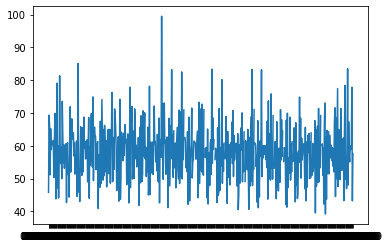

In [14]:
plt.plot(gb_date)

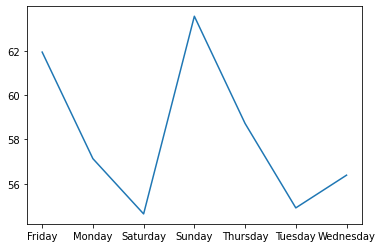

In [15]:
#group by weekday
gb_wd = data_renfe_time.groupby('depart_day').agg({'price':'mean'})
plt.plot(gb_wd)

In [16]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gb_wd_sorted = gb_wd.reindex(cats)

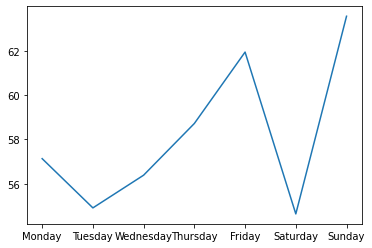

In [17]:
plt.plot(gb_wd_sorted)

In [18]:
#group by departure time
data_renfe_time["depart_hour"] = data_renfe_time["depart_time"].apply(lambda x: x[:2])

In [19]:
data_renfe_time.head(15)

,id,origin,destination,departure,arrival,duration,vehicle_class,price,fare,depart_day,depart_date,depart_time,arrival_day,arrival_date,arrival_time,depart_hour
0,4,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,Preferente,NaN,Promo,Thursday,18-04-2019,15:30:00,Thursday,18-04-2019,18:40:00,15
1,22,MADRID,BARCELONA,2019-04-18 10:30:00,2019-04-18 13:15:00,2.75,Turista Plus,102.15,Promo,Thursday,18-04-2019,10:30:00,Thursday,18-04-2019,13:15:00,10
2,73,MADRID,BARCELONA,2019-05-22 17:30:00,2019-05-22 20:40:00,3.17,Turista,85.10,Promo,Wednesday,22-05-2019,17:30:00,Wednesday,22-05-2019,20:40:00,17
3,113,MADRID,BARCELONA,2019-05-22 19:00:00,2019-05-22 21:30:00,2.50,Turista Plus,82.35,Promo,Wednesday,22-05-2019,19:00:00,Wednesday,22-05-2019,21:30:00,19
4,138,MADRID,BARCELONA,2019-04-22 07:15:00,2019-04-22 16:37:00,9.37,Turista,43.25,Adulto ida,Monday,22-04-2019,07:15:00,Monday,22-04-2019,16:37:00,07
5,167,MADRID,BARCELONA,2019-04-22 18:30:00,2019-04-22 21:20:00,2.83,Turista,107.70,Flexible,Monday,22-04-2019,18:30:00,Monday,22-04-2019,21:20:00,18
6,173,MADRID,BARCELONA,2019-04-22 17:30:00,2019-04-22 20:40:00,3.17,Turista,107.70,Flexible,Monday,22-04-2019,17:30:00,Monday,22-04-2019,20:40:00,17
7,210,MADRID,BARCELONA,2019-04-27 17:30:00,2019-04-27 20:40:00,3.17,Turista Plus,49.15,Promo,Saturday,27-04-2019,17:30:00,Saturday,27-04-2019,20:40:00,17
8,222,MADRID,BARCELONA,2019-05-28 08:20:00,2019-05-28 11:05:00,2.75,Turista,75.40,Promo,Tuesday,28-05-2019,08:20:00,Tuesday,28-05-2019,11:05:00,08
9,226,MADRID,BARCELONA,2019-05-28 09:00:00,2019-05-28 11:45:00,2.75,Turista,85.10,Promo,Tuesday,28-05-2019,09:00:00,Tuesday,28-05-2019,11:45:00,09


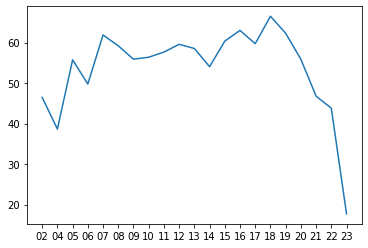

In [20]:
gb_hour = data_renfe_time.groupby('depart_hour').agg({'price':'mean'})
plt.plot(gb_hour)

In [21]:
del gb_hour

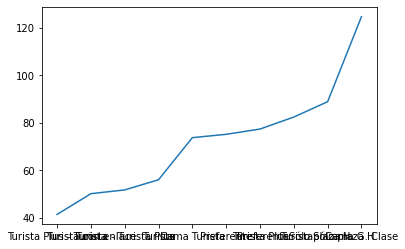

In [22]:
gb_class = data_renfe_time.groupby('vehicle_class').agg({'price':'mean'})
gb_class = gb_class.sort_values('price')
plt.plot(gb_class)

In [23]:
del gb_class

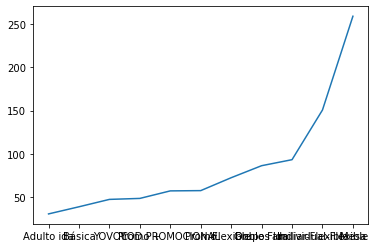

In [24]:
gb_fare = data_renfe_time.groupby('fare').agg({'price':'mean'})
gb_fare = gb_fare.sort_values('price')
plt.plot(gb_fare)

In [25]:
gb_fare = gb_fare.iloc[1: , :]

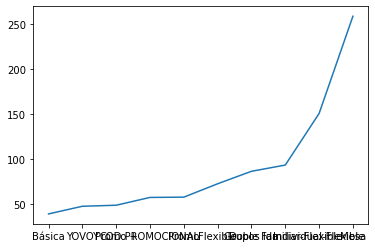

In [26]:
plt.plot(gb_fare)

In [27]:
gb_fare.head(15)

,price
fare,
Básica,38.620074
YOVOY,47.162059
Promo +,48.300395
COD.PROMOCIONAL,57.008857
Promo,57.318251
Flexible,72.244531
Grupos Ida,86.150000
Doble Familiar-Flexible,93.115789
Individual-Flexible,150.600000


In [28]:
del gb_fare

In [29]:
#essai avec SVM
X = data_renfe_time[['origin', 'destination', 'duration', 'vehicle_class', 'fare', 'depart_day', 'depart_hour']]
X_or = pd.get_dummies(X['origin'])
X.drop(['origin'], axis=1)
X_des = pd.get_dummies(X['destination'])
X.drop(['destination'], axis=1)
X_class = pd.get_dummies(X['vehicle_class'])
X.drop(['vehicle_class'], axis=1)
X_fare = pd.get_dummies(X['fare'])
X.drop(['fare'], axis=1)
X_day = pd.get_dummies(X['depart_day'])
X.drop(['depart_day'], axis=1)
X_final = pd.concat(X,X_or,X_des,X_class,X_fare,X_day)
del X
del X_or
del X_des
del X_class
del X_fare
del X_day
y = data_renfe_time['price']
X_train,y_train,X_test,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/tmp/ipykernel_45213/1134226775.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_final = pd.concat(X,X_or,X_des,X_class,X_fare,X_day)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [30]:
data_renfe_time = data_renfe_time.dropna()

In [31]:
X = data_renfe_time[['origin', 'destination', 'duration', 'vehicle_class', 'fare', 'depart_day', 'depart_hour']]
X = pd.get_dummies(X , columns=['origin', 'destination', 'vehicle_class', 'fare', 'depart_day'])


In [38]:
X.head(250)

,duration,depart_hour,origin_ALBACETE,origin_ALICANTE,origin_BARCELONA,origin_CADIZ,origin_CASTELLO,origin_CASTELLON,origin_CIUDAD REAL,origin_CORDOBA,...,fare_Promo,fare_Promo +,fare_YOVOY,depart_day_Friday,depart_day_Monday,depart_day_Saturday,depart_day_Sunday,depart_day_Thursday,depart_day_Tuesday,depart_day_Wednesday
1,2.75,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3.17,17,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2.50,19,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9.37,07,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.83,18,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2.75,08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
269,3.17,19,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
270,3.17,19,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
271,2.75,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [32]:
y = data_renfe_time['price']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.99, random_state=42)

In [33]:
regr = svm.SVR()
regr.fit(X_train, y_train)

SVR()

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.99, random_state=43)

In [35]:
r2 = r2_score(y_train, regr.predict(X_train))
MSRE = mean_squared_error(y_train, regr.predict(X_train))
print(r2)
print(MSRE)

0.4689815870307792
328.86220317201486


In [36]:
X_train.shape

(14797, 90)